# 1. Introduction

# Libraries and Data importation

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import full dataframe
df = pd.read_parquet(r"C:\Users\mirko\Desktop\Curso Data Science DL\EDAHospDischarges_Chile2001-2024\data\processed\Discharges_2001-2024_bivariate_final.parquet")

# 2. Data Overview

In [5]:
# Shape of the dataset (rows, columns).

In [6]:
df.head()

,sex,age,health insurance,healthcare facility type,healthcare facility name,length of stay,discharge condition,primary diagnosis code,primary diagnosis name,year,chapter codes,chapter names,LOS_capped,group codes,group names
0,Male,60-69,Fonasa,Private,Clínica Familia,2,Deceased,C780,tumor maligno secundario del pulmon,2001,C00-D48,tumores [neoplasias],2,C76-C80,tumores [neoplasias] malignos de sitios mal de...
1,Male,70-79,Fonasa,Public,"Hospital Del Salvador (Santiago, Providencia)",58,Deceased,E145,"diabetes mellitus no especificada, con complic...",2001,E00-E90,"enfermedades endocrinas, nutricionales y metab...",58,E10-E14,diabetes mellitus
2,Male,70-79,Fonasa,Public,"Hospital Del Salvador (Santiago, Providencia)",12,Deceased,J189,"neumonia, no especificada",2001,J00-J99,enfermedades del sistema respiratorio,12,J09-J18,influenza [gripe] y neumonía
3,Male,1-9,Fonasa,Public,Instituto de Neurocirugía Dr. Alfonso Asenjo,1,Deceased,S065,hemorragia subdural traumatica,2001,S00-T98,"traumatismos, envenenamientos y algunas otras ...",1,S00-S09,traumatismos de la cabeza
4,Male,80-120,Fonasa,Public,Hospital Dr. Leonardo Guzmán (Antofagasta),7,Alive,K830,colangitis,2001,K00-K93,enfermedades del sistema digestivo,7,K80-K87,"trastornos de la vesícula biliar, de las vías ..."


In [7]:
df.shape

(25758741, 15)

# Data dictionary / main variables (categorical, numerical).

In [9]:
# Data type customization really helped to reduce memory usage, increasing speed and capacity to create new columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25758741 entries, 0 to 25758740
Data columns (total 15 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   sex                       category
 1   age                       category
 2   health insurance          category
 3   healthcare facility type  category
 4   healthcare facility name  object  
 5   length of stay            int32   
 6   discharge condition       category
 7   primary diagnosis code    category
 8   primary diagnosis name    category
 9   year                      int32   
 10  chapter codes             category
 11  chapter names             object  
 12  LOS_capped                int32   
 13  group codes               category
 14  group names               category
dtypes: category(10), int32(3), object(2)
memory usage: 1.0+ GB


# ACTUALIZAR VARIABLES

# Missing values / NA treatment summary.

In [12]:
# Dataframe is cleaned from previous steps
df.isna().sum()

sex                         0
age                         0
health insurance            0
healthcare facility type    0
healthcare facility name    0
length of stay              0
discharge condition         0
primary diagnosis code      0
primary diagnosis name      0
year                        0
chapter codes               0
chapter names               0
LOS_capped                  0
group codes                 0
group names                 0
dtype: int64

# First impressions after bivariate analysis (anything noteworthy?). HACERLO

# List of pairs of variables to perform bivariate analysis (CHECK CHAT GPT CONVERSATION TO HAVE MORE GUIDANCE). POR HACER

# 3. Multivariate analysis (RECUERDA SIEMPRE RELACIONAR CON PREGUNTAS GUIA)

# 2. Purpose / Guiding Question


# 3. Exploratory Multivariate Visualization (Descriptive Level)

# 5. Insights and Synthesis

# Structure

# Estructura opción 2:

# 1. Group 1: [Diagnosis] x [Age] x [Sex] x [Insurance]

# 1. Objective & Variables

# 2. Descriptive Overview (Base Tables)

In [25]:
# Count diagnoses
diagnosis_counts = df['group names'].value_counts()

# Select top 15
top15_diagnoses = diagnosis_counts.head(15).index.tolist()

# Create a copy of the column
diag_grouped = df['group names'].copy()

# Convert to categorical if not already
diag_grouped = diag_grouped.astype('category')

# Add 'Other' as a category
if 'Other' not in diag_grouped.cat.categories:
    diag_grouped = diag_grouped.cat.add_categories('Other')

# Replace all diagnoses not in top 15 with 'Other'
diag_grouped = diag_grouped.where(diag_grouped.isin(top15_diagnoses), 'Other')

# Optional: attach it back to the dataframe
df['Diagnosis_grouped'] = diag_grouped

# Check the result
df['Diagnosis_grouped'].value_counts().head(16)


Diagnosis_grouped
Other                                                                    15817408
trastornos de la vesícula biliar, de las vías biliares y del páncreas     1508792
influenza [gripe] y neumonía                                              1302182
enfermedades del apéndice                                                  810863
otras formas de enfermedad del corazón                                     687480
hernia                                                                     647833
otras enfermedades de las vías respiratorias superiores                    611966
enfermedades cerebrovasculares                                             563953
trastornos no inflamatorios de los órganos genitales femeninos             549860
enfermedades de los órganos genitales masculinos                           516349
enfermedades isquémicas del corazón                                        504071
tumores [neoplasias] benignos                                              48774

In [126]:
df['Diagnosis_grouped'].value_counts().head(16).sum()

25758741

In [130]:
# Total proportion of top 15 most frequent diagnoses is 38.59%
100-(15817408*100/25758741)

38.59401746381937

In [26]:
# Counts

In [27]:
ct_g_1 = pd.crosstab(index=[df['age'], df['sex'], df["health insurance"]], columns=df['Diagnosis_grouped'])

In [28]:
ct_g_1

Diagnosis_grouped               enfermedades cerebrovasculares  \
age    sex    health insurance                                   
0-1    Male   Fonasa                                       377   
              Isapre                                        95   
       Female Fonasa                                       194   
              Isapre                                        58   
1-9    Male   Fonasa                                       688   
              Isapre                                       112   
       Female Fonasa                                       433   
              Isapre                                       104   
10-19  Male   Fonasa                                      1443   
              Isapre                                       281   
       Female Fonasa                                       964   
              Isapre                                       242   
20-29  Male   Fonasa                                      2633   
              Isapre                                       769   
       Female Fonasa                                      2667   
              Isapre                                       790   
30-39  Male   Fonasa                                      6179   
              Isapre                                      1970   
       Female Fonasa                                      6268   
              Isapre                                      2065   
40-49  Male   Fonasa                                     18148   
              Isapre                                      3522   
       Female Fonasa                                     16795   
              Isapre                                      3305   
50-59  Male   Fonasa                                     44794   
              Isapre                                      5742   
       Female Fonasa                                     30132   
              Isapre                                      4027   
60-69  Male   Fonasa                                     76752   
              Isapre                                      6772   
       Female Fonasa                                     45486   
              Isapre                                      3789   
70-79  Male   Fonasa                                     82152   
              Isapre                                      5452   
       Female Fonasa                                     61067   
              Isapre                                      3373   
80-120 Male   Fonasa                                     51655   
              Isapre                                      3518   
       Female Fonasa                                     65575   
              Isapre                                      3565   

Diagnosis_grouped               enfermedades crónicas de las vías respiratorias inferiores   \
age    sex    health insurance                                                                
0-1    Male   Fonasa                                                        35779             
              Isapre                                                         2133             
       Female Fonasa                                                        17880             
              Isapre                                                         1060             
1-9    Male   Fonasa                                                        35329             
              Isapre                                                         5893             
       Female Fonasa                                                        22960             
              Isapre                                                         3640             
10-19  Male   Fonasa                                                         8688             
              Isapre                                                         1829             
       Female Fonasa                                                         6636      

In [29]:
# Proportions

In [30]:
# Proportions with "other" included
ct_g_1_norm = pd.crosstab(index=[df['age'], df['sex'], df["health insurance"]], columns=df['Diagnosis_grouped'], normalize = 'index')

In [31]:
ct_g_1_norm.index = [
    f"{sex} | {insurance} | {age}" 
    for sex, insurance, age in ct_g_1_norm.index
]


In [32]:
ct_g_1_norm

Diagnosis_grouped,enfermedades cerebrovasculares,enfermedades crónicas de las vías respiratorias inferiores,enfermedades de los órganos genitales masculinos,enfermedades del apéndice,enfermedades infecciosas intestinales,enfermedades isquémicas del corazón,hernia,influenza [gripe] y neumonía,otras enfermedades de las vías respiratorias superiores,otras enfermedades de los intestinos,otras formas de enfermedad del corazón,"trastornos de la vesícula biliar, de las vías biliares y del páncreas",trastornos no inflamatorios de los órganos genitales femeninos,traumatismos de la cabeza,tumores [neoplasias] benignos,Other
0-1 | Male | Fonasa,0.000336,0.031906,0.005237,0.000930,0.050229,0.000043,0.015441,0.160178,0.003332,0.005116,0.001581,0.000315,0.000000,0.012844,0.001796,0.710716
0-1 | Male | Isapre,0.000589,0.013216,0.020633,0.000744,0.064296,0.000081,0.029673,0.093349,0.013191,0.007491,0.001543,0.000607,0.000000,0.021265,0.003402,0.729922
0-1 | Female | Fonasa,0.000254,0.023415,0.000000,0.000829,0.048903,0.000041,0.008470,0.145440,0.002741,0.003710,0.001765,0.000452,0.000380,0.012731,0.002216,0.748654
0-1 | Female | Isapre,0.000515,0.009416,0.000000,0.000702,0.063946,0.000071,0.020270,0.091570,0.010499,0.004850,0.001874,0.000844,0.000862,0.022357,0.004495,0.767730
1-9 | Male | Fonasa,0.000662,0.034001,0.073655,0.064617,0.048004,0.000081,0.017449,0.093091,0.107539,0.011422,0.001646,0.001119,0.000000,0.036340,0.005829,0.504545
1-9 | Male | Isapre,0.000415,0.021855,0.156526,0.041304,0.050030,0.000045,0.020164,0.060830,0.174239,0.007421,0.001480,0.001769,0.000000,0.037013,0.007703,0.419206
1-9 | Female | Fonasa,0.000657,0.034818,0.000002,0.059443,0.054319,0.000058,0.016191,0.120095,0.116334,0.010429,0.002250,0.002064,0.001098,0.030183,0.008178,0.543882
1-9 | Female | Isapre,0.000654,0.022885,0.000000,0.041457,0.064877,0.000069,0.021099,0.087975,0.208511,0.008035,0.001773,0.002483,0.001125,0.036434,0.011927,0.490695
10-19 | Male | Fonasa,0.001687,0.010158,0.041509,0.151288,0.020904,0.000537,0.008461,0.022412,0.038203,0.010434,0.005516,0.009502,0.000000,0.042897,0.008888,0.627605
10-19 | Male | Isapre,0.001277,0.008314,0.077326,0.116634,0.028239,0.000186,0.010469,0.013829,0.073712,0.007655,0.006723,0.008610,0.000000,0.039481,0.014356,0.593187


In [33]:
# Drop 'Other' column before normalizing
crosstab_top15_g1 = ct_g_1.drop(columns='Other')

# Normalize by row (proportions within top 15)
crosstab_top15_g1 = crosstab_top15_g1.div(crosstab_top15_g1.sum(axis=1), axis=0)

# Flatten MultiIndex for plotting
crosstab_top15_g1.index = [
    f"{sex} | {insurance} | {age}" 
    for sex, insurance, age in crosstab_top15_g1.index]

In [34]:
crosstab_top15_g1

Diagnosis_grouped,enfermedades cerebrovasculares,enfermedades crónicas de las vías respiratorias inferiores,enfermedades de los órganos genitales masculinos,enfermedades del apéndice,enfermedades infecciosas intestinales,enfermedades isquémicas del corazón,hernia,influenza [gripe] y neumonía,otras enfermedades de las vías respiratorias superiores,otras enfermedades de los intestinos,otras formas de enfermedad del corazón,"trastornos de la vesícula biliar, de las vías biliares y del páncreas",trastornos no inflamatorios de los órganos genitales femeninos,traumatismos de la cabeza,tumores [neoplasias] benignos
0-1 | Male | Fonasa,0.001162,0.110292,0.018104,0.003215,0.173633,0.000148,0.053378,0.553706,0.011517,0.017685,0.005465,0.001088,0.000000,0.044398,0.006208
0-1 | Male | Isapre,0.002179,0.048934,0.076395,0.002753,0.238065,0.000298,0.109867,0.345638,0.048843,0.027736,0.005712,0.002248,0.000000,0.078735,0.012595
0-1 | Female | Fonasa,0.001011,0.093157,0.000000,0.003298,0.194566,0.000162,0.033699,0.578644,0.010905,0.014760,0.007023,0.001797,0.001511,0.050653,0.008815
0-1 | Female | Isapre,0.002218,0.040537,0.000000,0.003021,0.275307,0.000306,0.087269,0.394241,0.045202,0.020880,0.008069,0.003633,0.003710,0.096256,0.019351
1-9 | Male | Fonasa,0.001336,0.068626,0.148662,0.130420,0.096889,0.000163,0.035217,0.187890,0.217051,0.023053,0.003322,0.002259,0.000000,0.073346,0.011766
1-9 | Male | Isapre,0.000715,0.037630,0.269503,0.071116,0.086141,0.000077,0.034718,0.104736,0.300001,0.012778,0.002548,0.003046,0.000000,0.063728,0.013263
1-9 | Female | Fonasa,0.001440,0.076336,0.000003,0.130324,0.119089,0.000126,0.035498,0.263297,0.255052,0.022864,0.004934,0.004525,0.002407,0.066173,0.017930
1-9 | Female | Isapre,0.001284,0.044934,0.000000,0.081399,0.127382,0.000136,0.041428,0.172736,0.409404,0.015776,0.003481,0.004876,0.002210,0.071536,0.023417
10-19 | Male | Fonasa,0.004530,0.027277,0.111466,0.406256,0.056133,0.001441,0.022721,0.060183,0.102587,0.028018,0.014813,0.025516,0.000000,0.115192,0.023867
10-19 | Male | Isapre,0.003140,0.020438,0.190077,0.286702,0.069416,0.000458,0.025735,0.033993,0.181193,0.018818,0.016527,0.021164,0.000000,0.097050,0.035289


# Summary stats for numeric variables by categories (mean, median, count, IQR).

Variables are all categorical in this case

# 3. Visual Exploration (Core Plots)

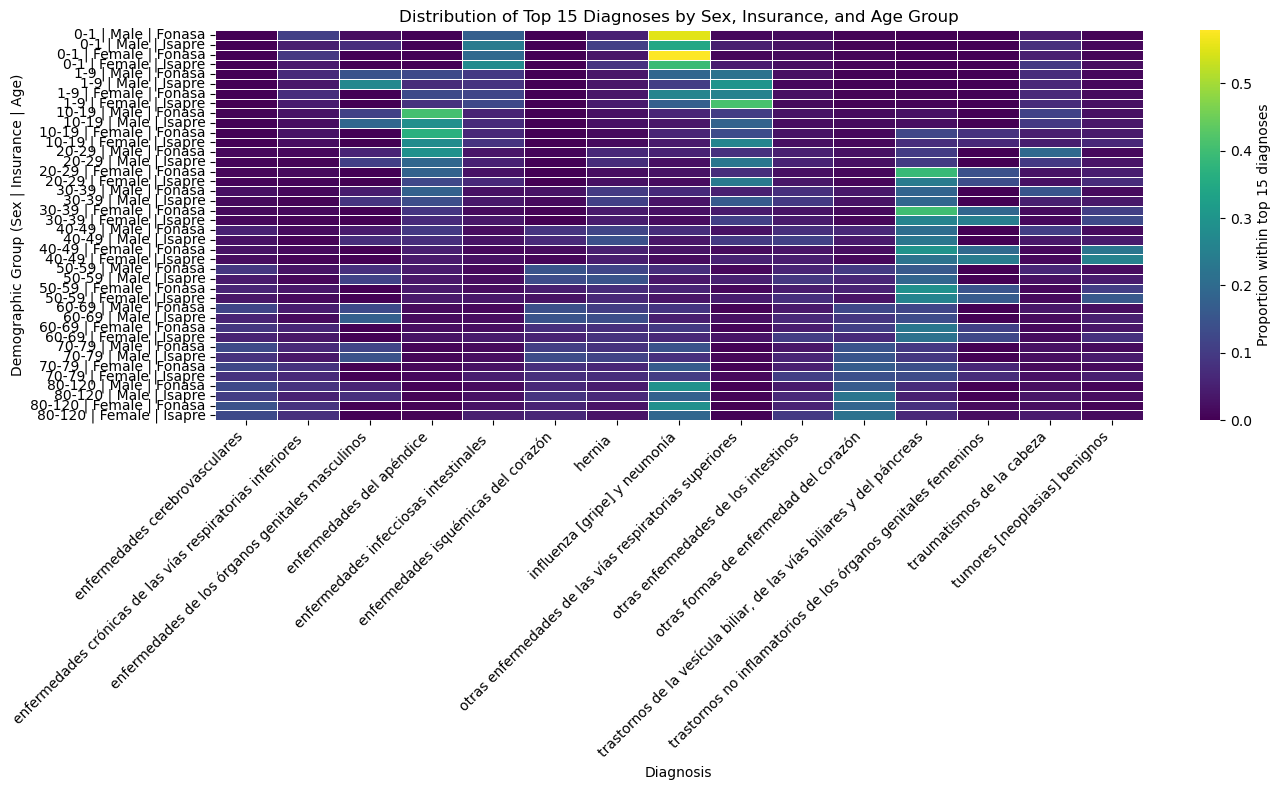

In [39]:

# 5️⃣ Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    crosstab_top15_g1, 
    cmap='viridis', 
    linewidths=0.5,
    cbar_kws={'label': 'Proportion within top 15 diagnoses'}
)
plt.title('Distribution of Top 15 Diagnoses by Sex, Insurance, and Age Group')
plt.xlabel('Diagnosis')
plt.ylabel('Demographic Group (Sex | Insurance | Age)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ANALISIS LISTO, AHORA TOCA SEGUIR ACA CON LA INTERPRETACION DE LOS RESULTADOS

In [ ]:
# Total proportion of top 15 most frequent diagnoses is 38.59%
# Among top 15 most frequent diagnosis

In [40]:
crosstab_top15_g1.reset_index()

Diagnosis_grouped,index,enfermedades cerebrovasculares,enfermedades crónicas de las vías respiratorias inferiores,enfermedades de los órganos genitales masculinos,enfermedades del apéndice,enfermedades infecciosas intestinales,enfermedades isquémicas del corazón,hernia,influenza [gripe] y neumonía,otras enfermedades de las vías respiratorias superiores,otras enfermedades de los intestinos,otras formas de enfermedad del corazón,"trastornos de la vesícula biliar, de las vías biliares y del páncreas",trastornos no inflamatorios de los órganos genitales femeninos,traumatismos de la cabeza,tumores [neoplasias] benignos
0,0-1 | Male | Fonasa,0.001162,0.110292,0.018104,0.003215,0.173633,0.000148,0.053378,0.553706,0.011517,0.017685,0.005465,0.001088,0.000000,0.044398,0.006208
1,0-1 | Male | Isapre,0.002179,0.048934,0.076395,0.002753,0.238065,0.000298,0.109867,0.345638,0.048843,0.027736,0.005712,0.002248,0.000000,0.078735,0.012595
2,0-1 | Female | Fonasa,0.001011,0.093157,0.000000,0.003298,0.194566,0.000162,0.033699,0.578644,0.010905,0.014760,0.007023,0.001797,0.001511,0.050653,0.008815
3,0-1 | Female | Isapre,0.002218,0.040537,0.000000,0.003021,0.275307,0.000306,0.087269,0.394241,0.045202,0.020880,0.008069,0.003633,0.003710,0.096256,0.019351
4,1-9 | Male | Fonasa,0.001336,0.068626,0.148662,0.130420,0.096889,0.000163,0.035217,0.187890,0.217051,0.023053,0.003322,0.002259,0.000000,0.073346,0.011766
5,1-9 | Male | Isapre,0.000715,0.037630,0.269503,0.071116,0.086141,0.000077,0.034718,0.104736,0.300001,0.012778,0.002548,0.003046,0.000000,0.063728,0.013263
6,1-9 | Female | Fonasa,0.001440,0.076336,0.000003,0.130324,0.119089,0.000126,0.035498,0.263297,0.255052,0.022864,0.004934,0.004525,0.002407,0.066173,0.017930
7,1-9 | Female | Isapre,0.001284,0.044934,0.000000,0.081399,0.127382,0.000136,0.041428,0.172736,0.409404,0.015776,0.003481,0.004876,0.002210,0.071536,0.023417
8,10-19 | Male | Fonasa,0.004530,0.027277,0.111466,0.406256,0.056133,0.001441,0.022721,0.060183,0.102587,0.028018,0.014813,0.025516,0.000000,0.115192,0.023867
9,10-19 | Male | Isapre,0.003140,0.020438,0.190077,0.286702,0.069416,0.000458,0.025735,0.033993,0.181193,0.018818,0.016527,0.021164,0.000000,0.097050,0.035289


In [41]:
df_reset_g1 = crosstab_top15_g1.reset_index().rename(columns={'index': 'demographic'})

In [42]:
# split the single demographic string into 3 columns
df_reset_g1[['age', 'sex', 'health insurance']] = (
    df_reset_g1['demographic']
    .str.split(r'\s*\|\s*', expand=True)   # splits on " | " allowing variable spaces
)

In [43]:
# now melt, using the new columns as id_vars
long_df_g1 = df_reset_g1.drop(columns=['demographic']).melt(
    id_vars=['age', 'sex', 'health insurance'],
    var_name='Diagnosis_grouped',
    value_name='proportion'
)

In [44]:
long_df_g1

,age,sex,health insurance,Diagnosis_grouped,proportion
0,0-1,Male,Fonasa,enfermedades cerebrovasculares,0.001162
1,0-1,Male,Isapre,enfermedades cerebrovasculares,0.002179
2,0-1,Female,Fonasa,enfermedades cerebrovasculares,0.001011
3,0-1,Female,Isapre,enfermedades cerebrovasculares,0.002218
4,1-9,Male,Fonasa,enfermedades cerebrovasculares,0.001336
...,...,...,...,...,...
595,70-79,Female,Isapre,tumores [neoplasias] benignos,0.047618
596,80-120,Male,Fonasa,tumores [neoplasias] benignos,0.008708
597,80-120,Male,Isapre,tumores [neoplasias] benignos,0.019330
598,80-120,Female,Fonasa,tumores [neoplasias] benignos,0.005361


In [45]:
# With sex

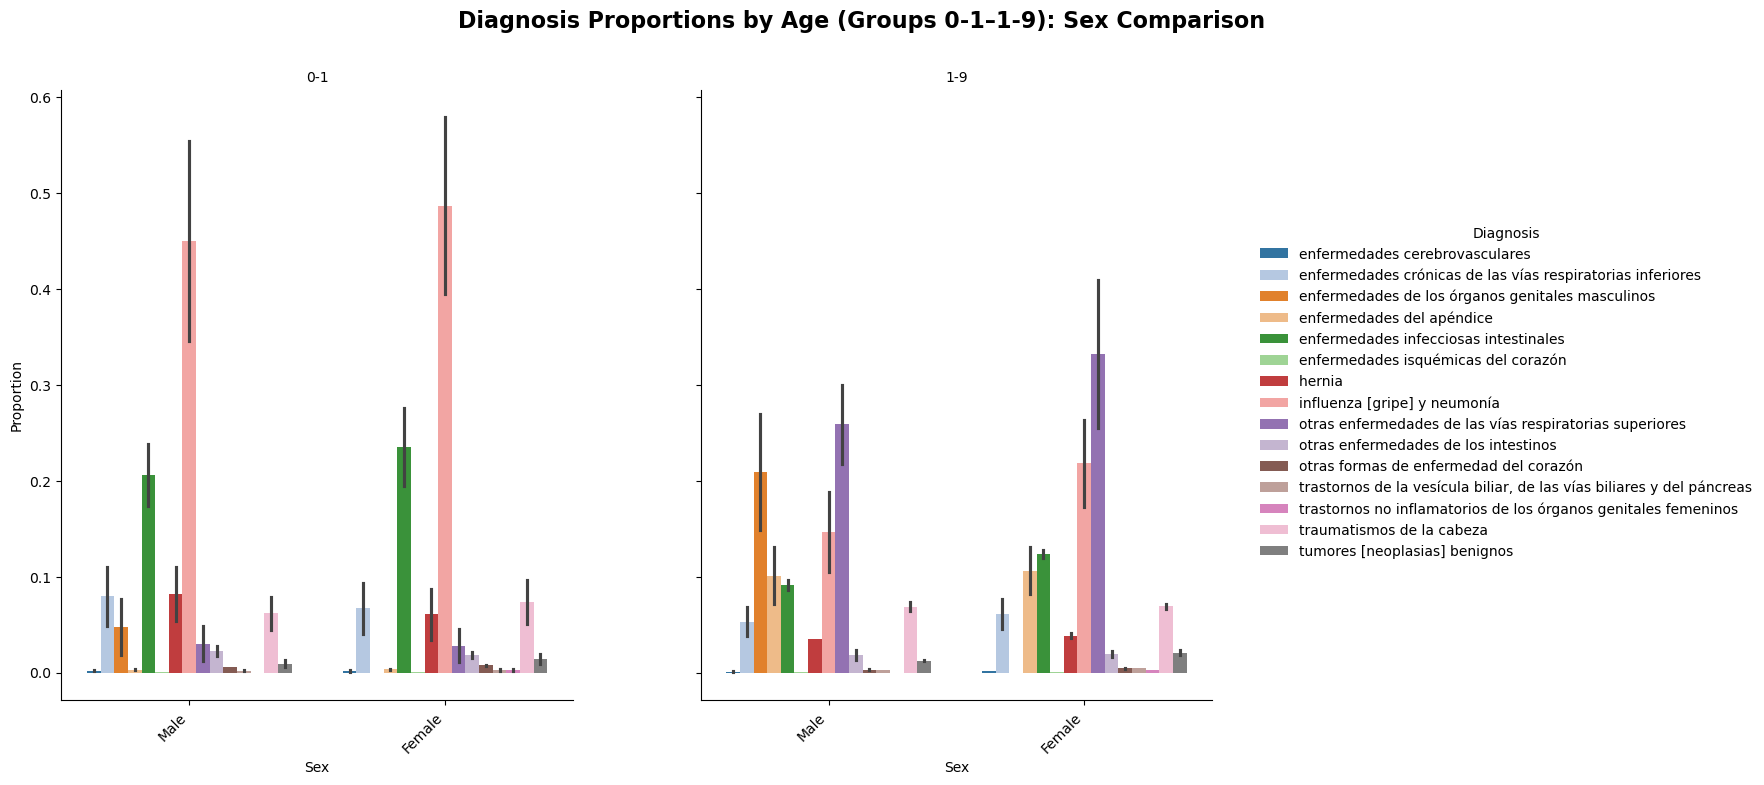

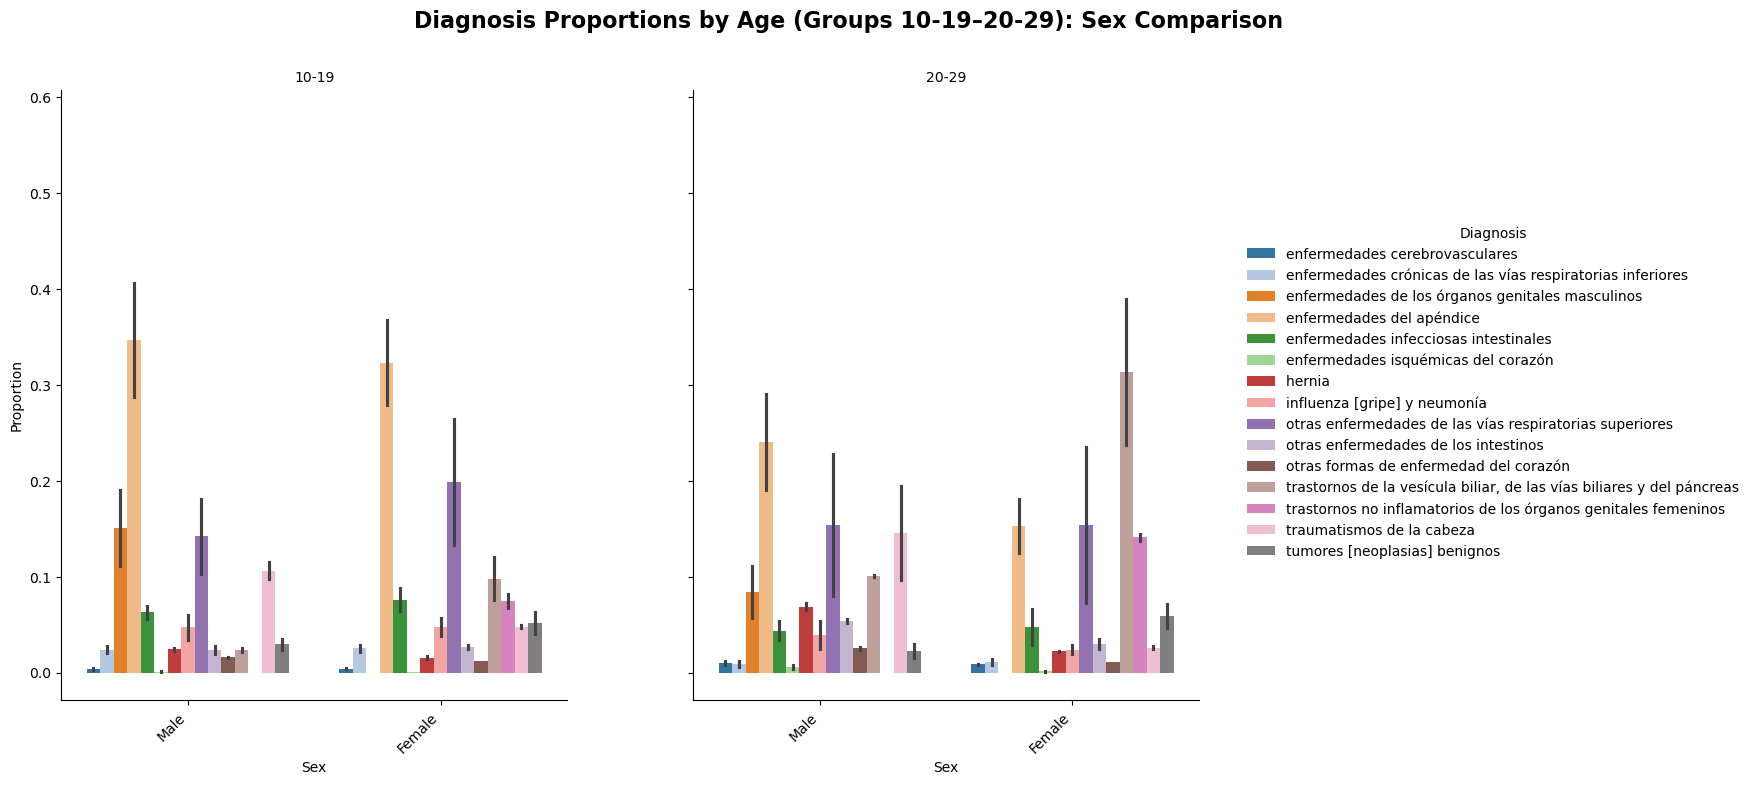

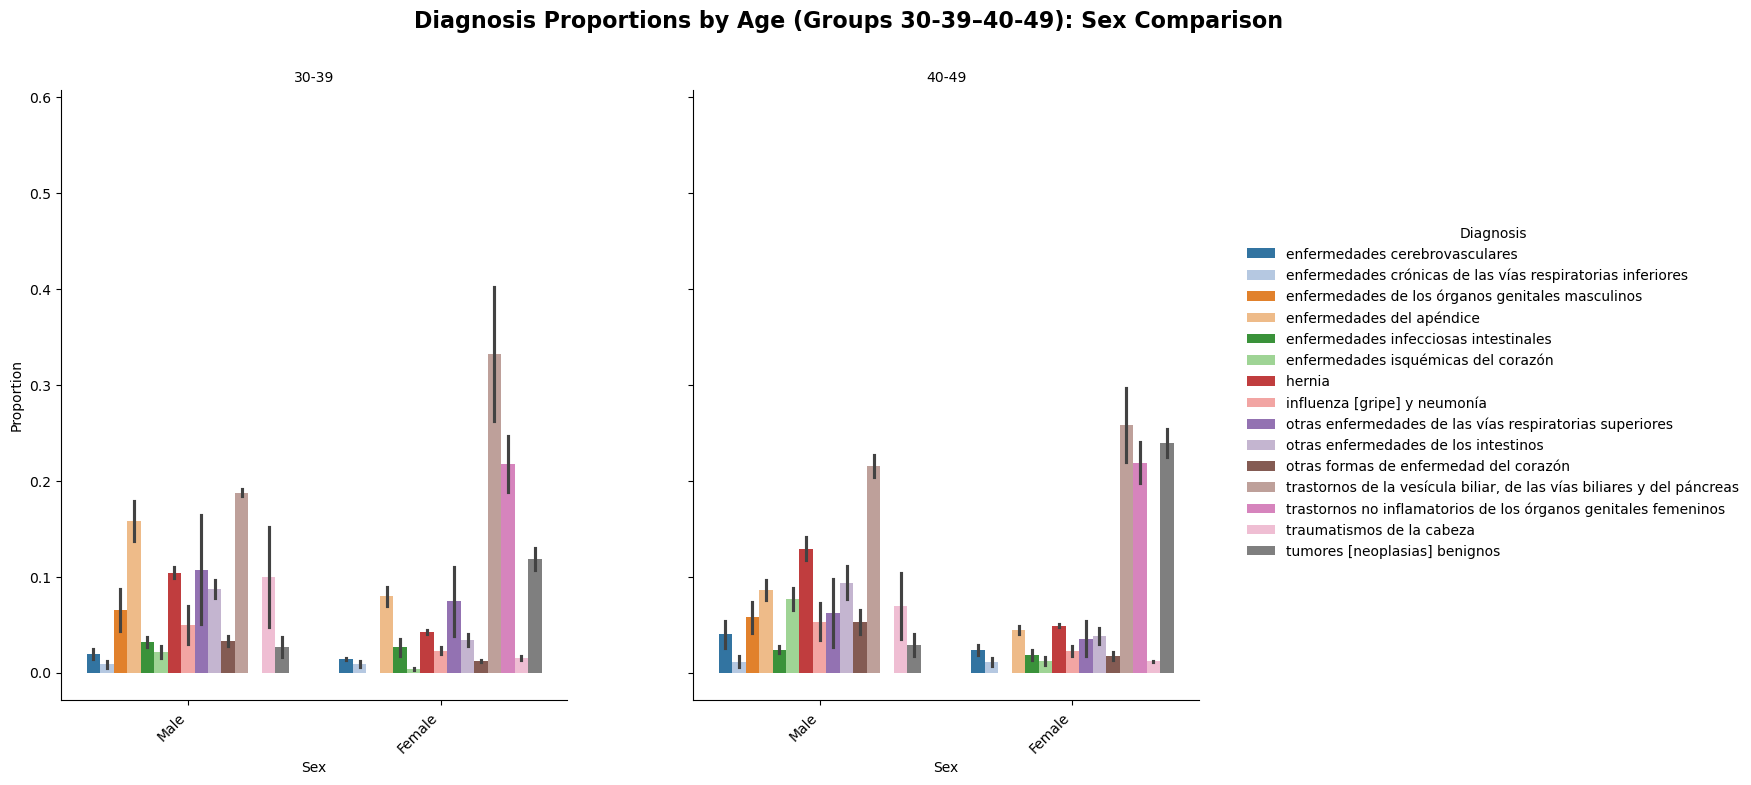

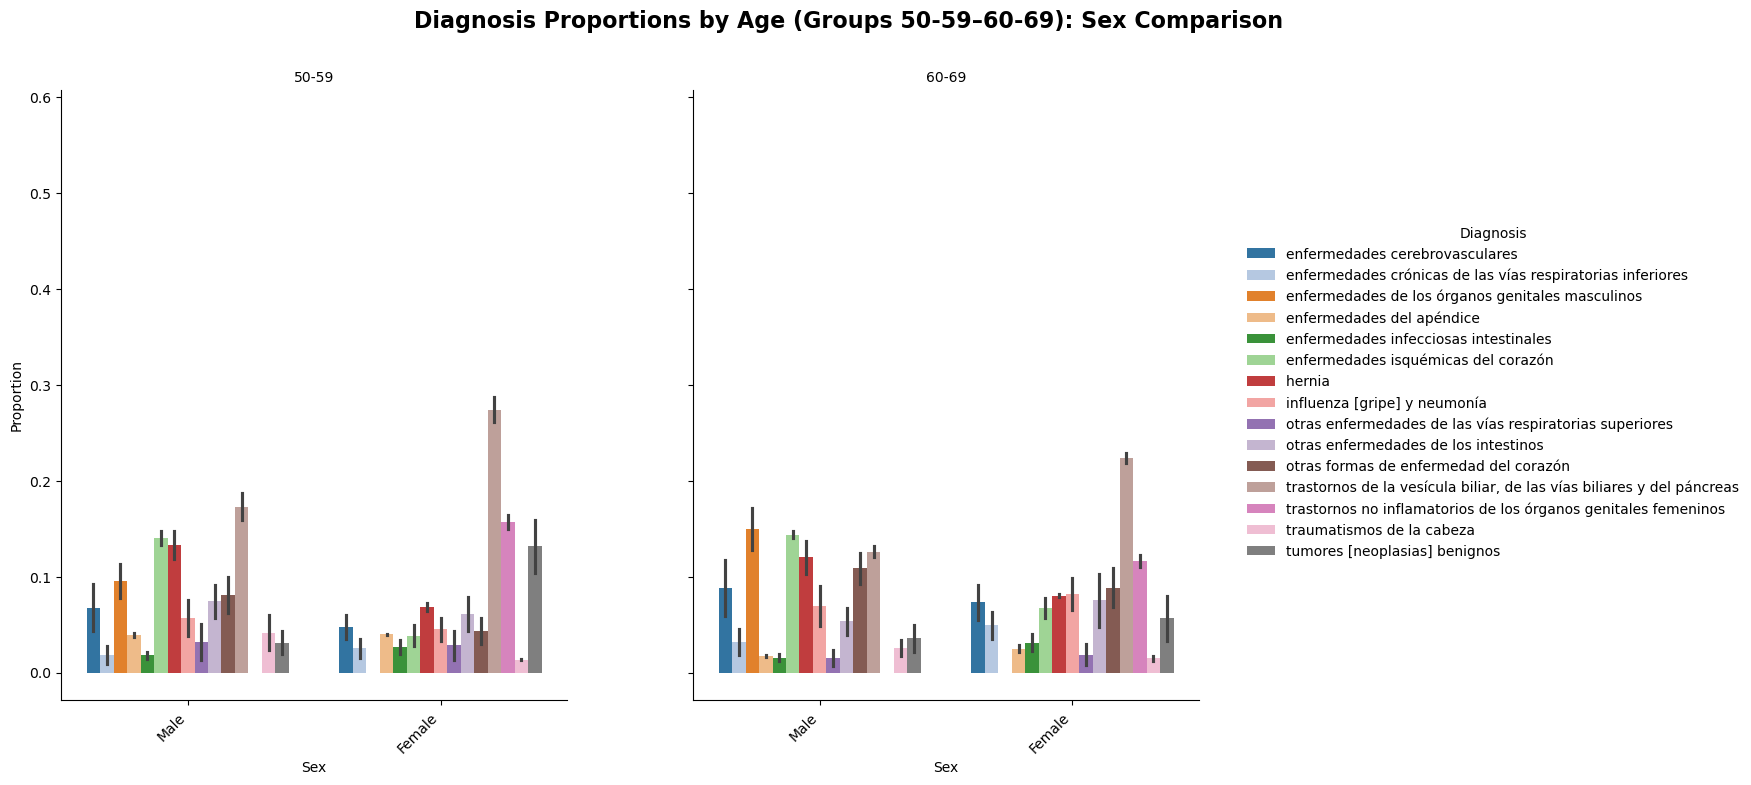

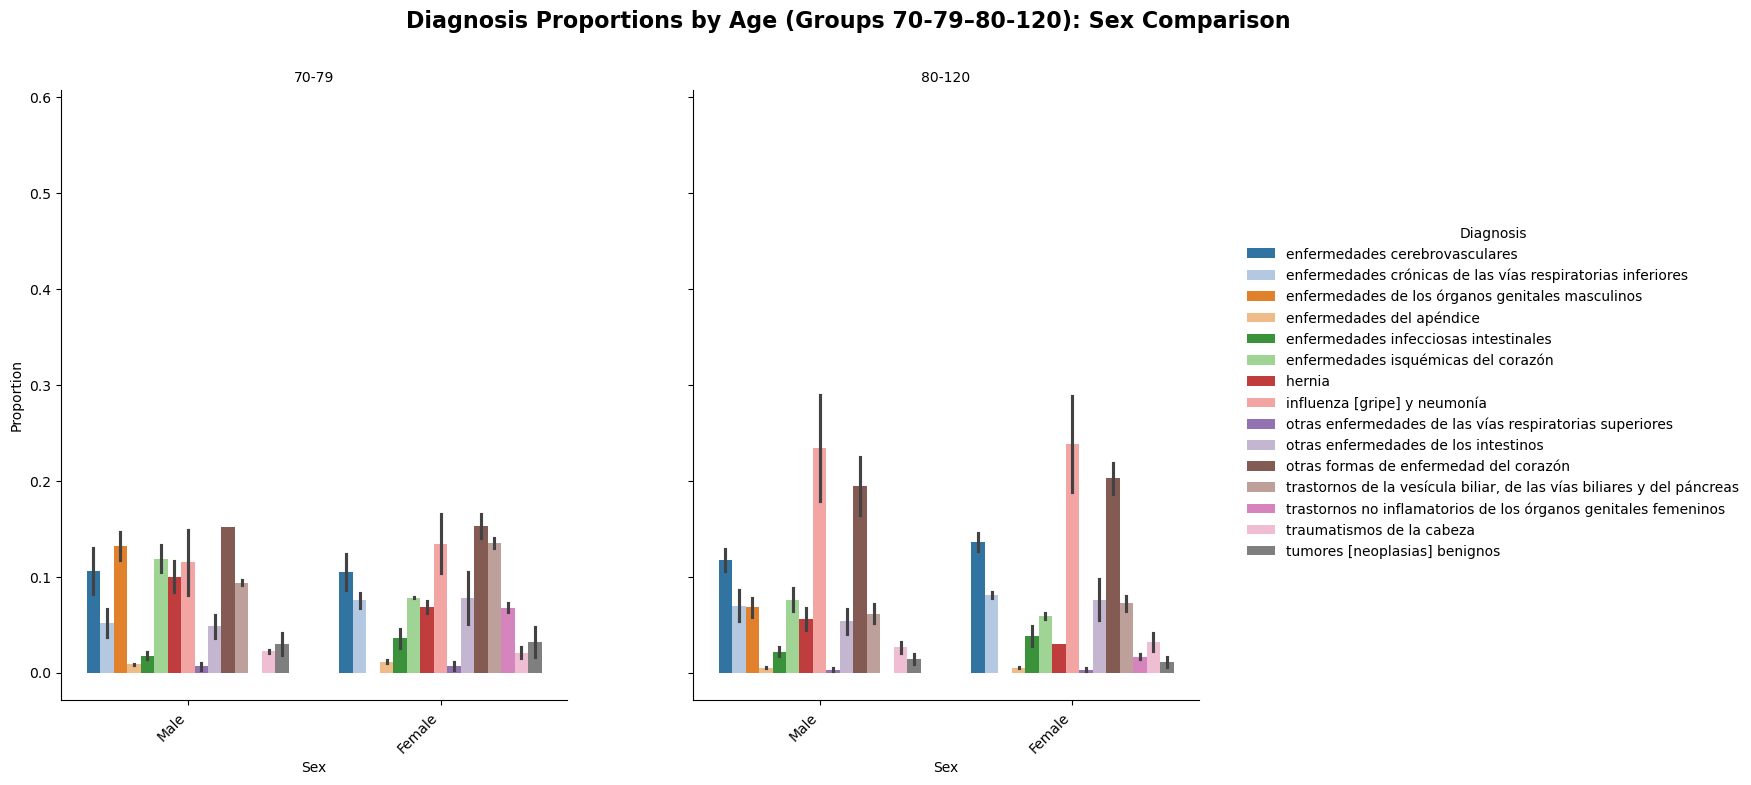

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# === Sort unique ages to keep them ordered ===
age_groups = sorted(long_df_g1['age'].unique())

# === Split the list into chunks of 2 ===
def chunk_list(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# === Find global y-axis range ===
y_min = long_df_g1['proportion'].min()
y_max = long_df_g1['proportion'].max()
y_buffer = (y_max - y_min) * 0.05
y_min -= y_buffer
y_max += y_buffer

# === Fix color order (palette) across all figures ===
diagnosis_order = sorted(long_df_g1['Diagnosis_grouped'].unique())

# Use a categorical palette with clearly distinct colors (up to 20)
palette = sns.color_palette("tab20", n_colors=len(diagnosis_order))

# === Loop over age group chunks (2 per figure) ===
for i, age_chunk in enumerate(chunk_list(age_groups, 2), start=1):
    df_subset = long_df_g1[long_df_g1['age'].isin(age_chunk)]

    g = sns.catplot(
        data=df_subset,
        kind='bar',
        x='sex',
        y='proportion',
        hue='Diagnosis_grouped',
        hue_order=diagnosis_order,    # consistent color mapping
        col='age',                    # one subplot per age group
        height=5,
        aspect=1.2,
        palette=palette,
        legend_out=True
    )

    # === Styling ===
    g.set_axis_labels("Sex", "Proportion")
    g.set_titles("{col_name}")
    g._legend.set_title("Diagnosis")
    g.set_xticklabels(rotation=45, ha='right')

    # Consistent y-axis limits
    for ax in g.axes.flatten():
        ax.set_ylim(y_min, y_max)

    # Layout and title
    g.fig.subplots_adjust(top=0.88, wspace=0.25)
    g.fig.set_size_inches(18, 8)
    g.fig.suptitle(
        f"Diagnosis Proportions by Age (Groups {age_chunk[0]}–{age_chunk[-1]}): Sex Comparison",
        fontsize=16,
        fontweight='bold'
    )

    plt.show()


In [47]:
# With insurance

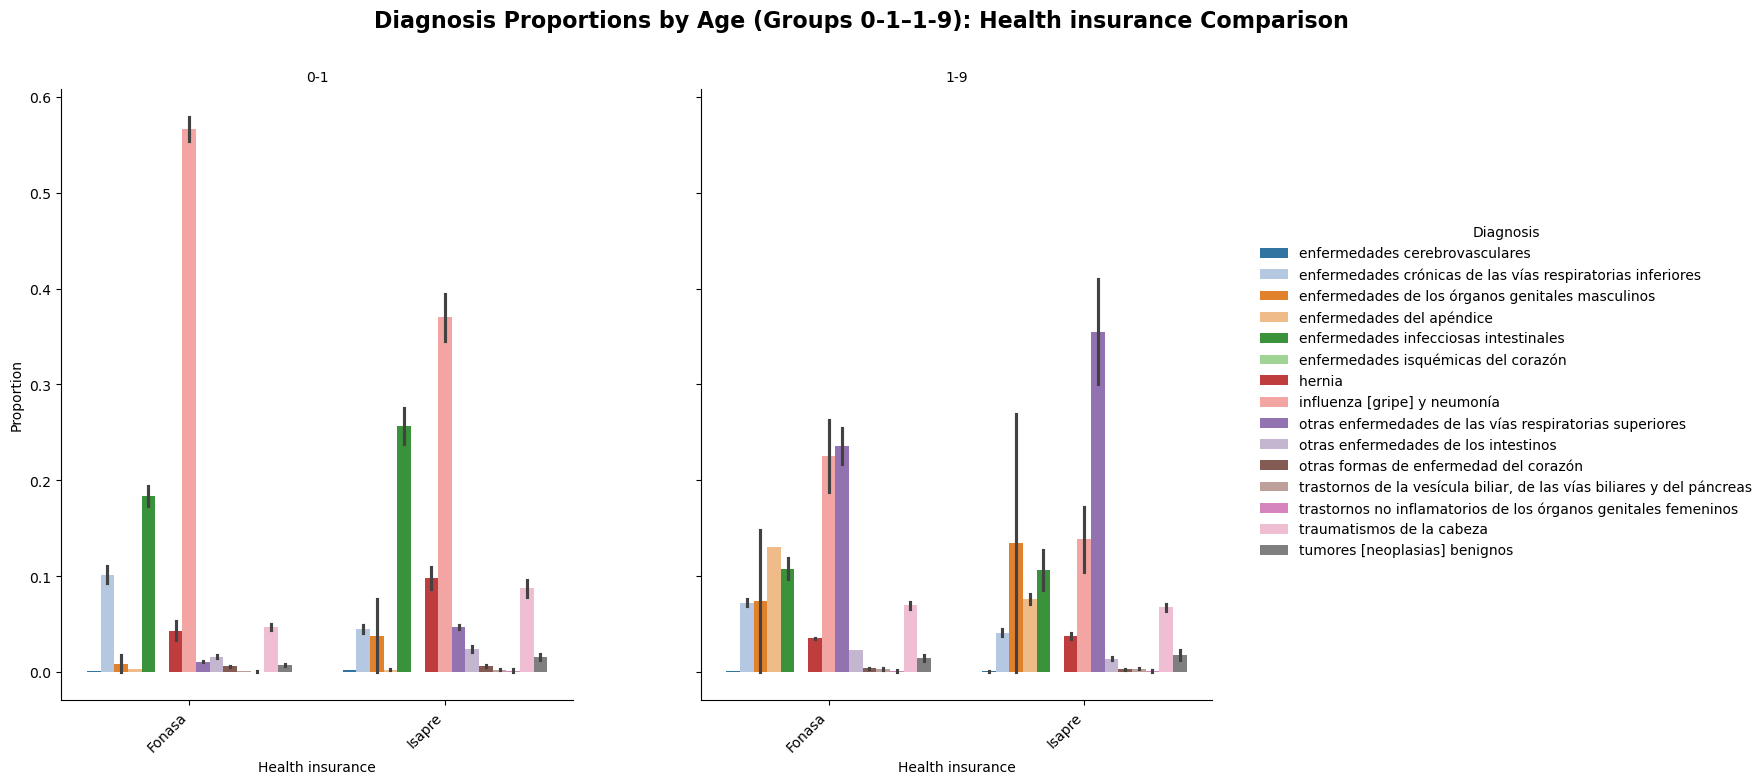

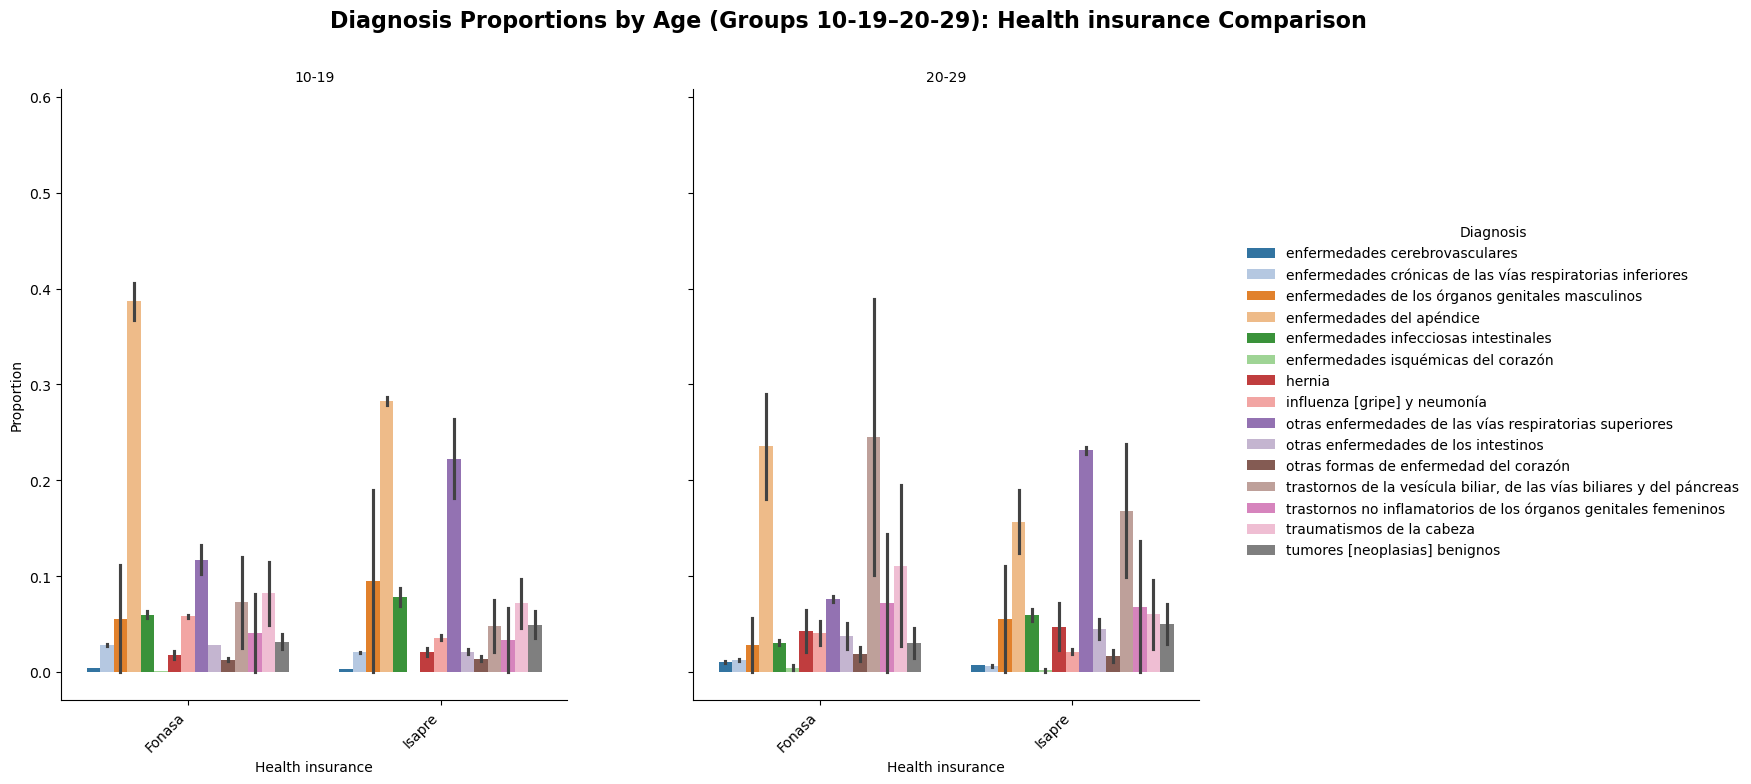

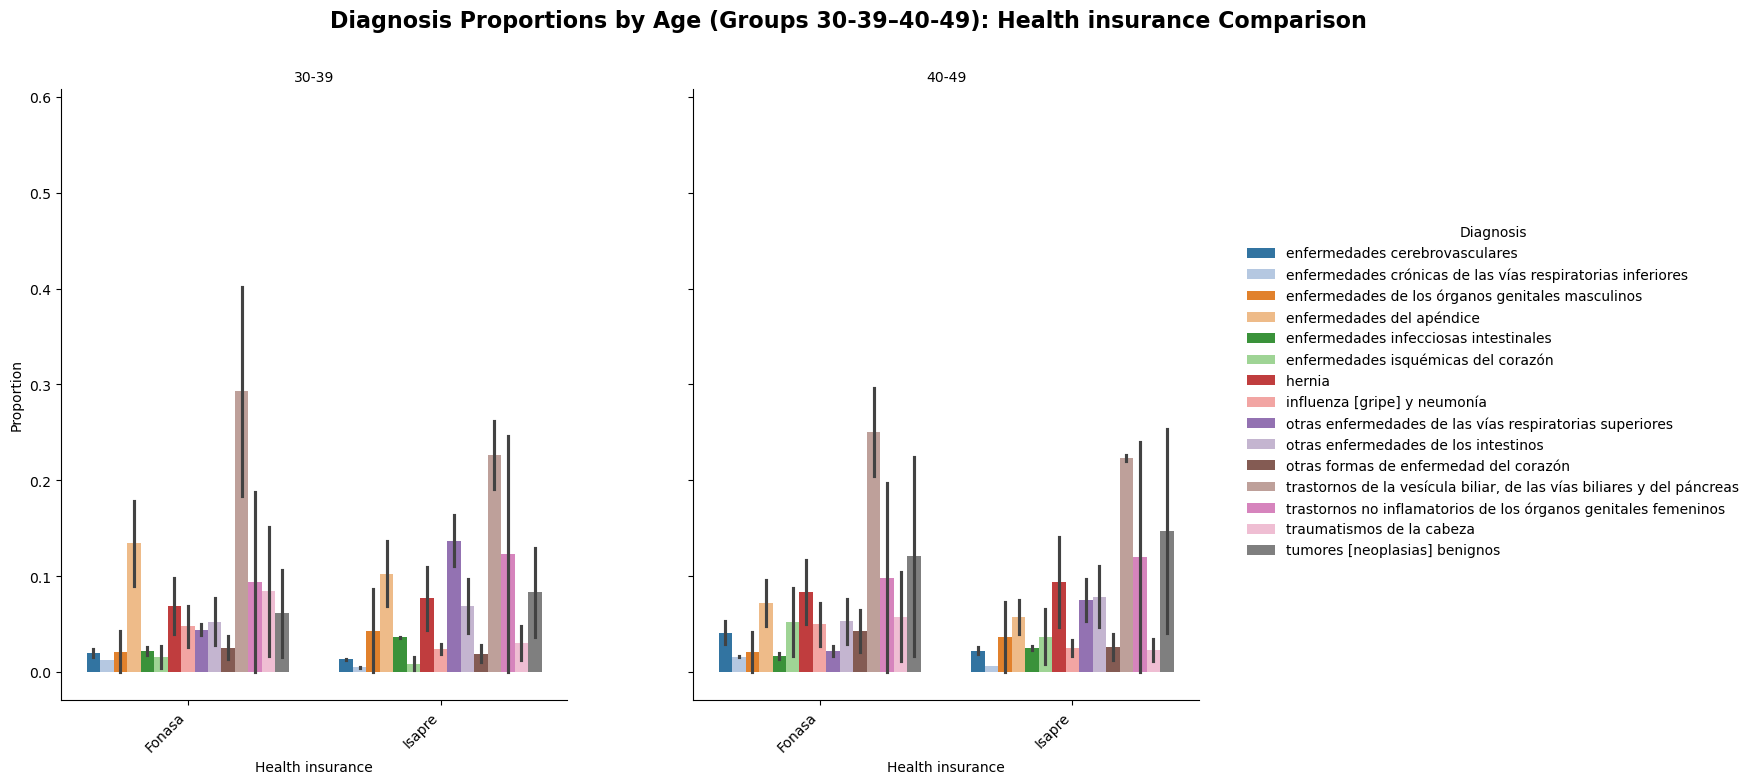

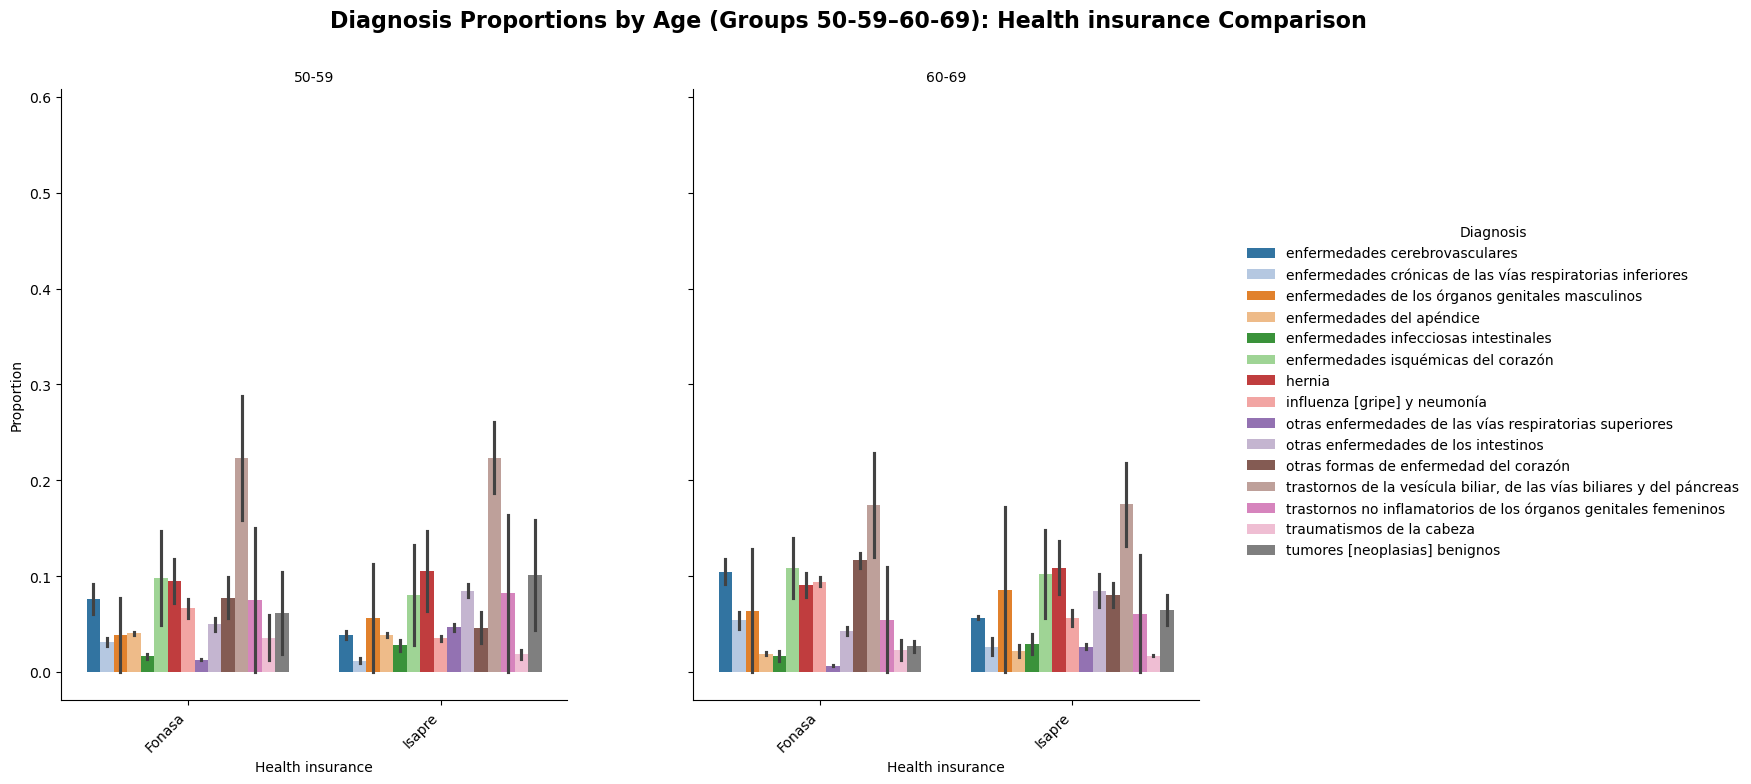

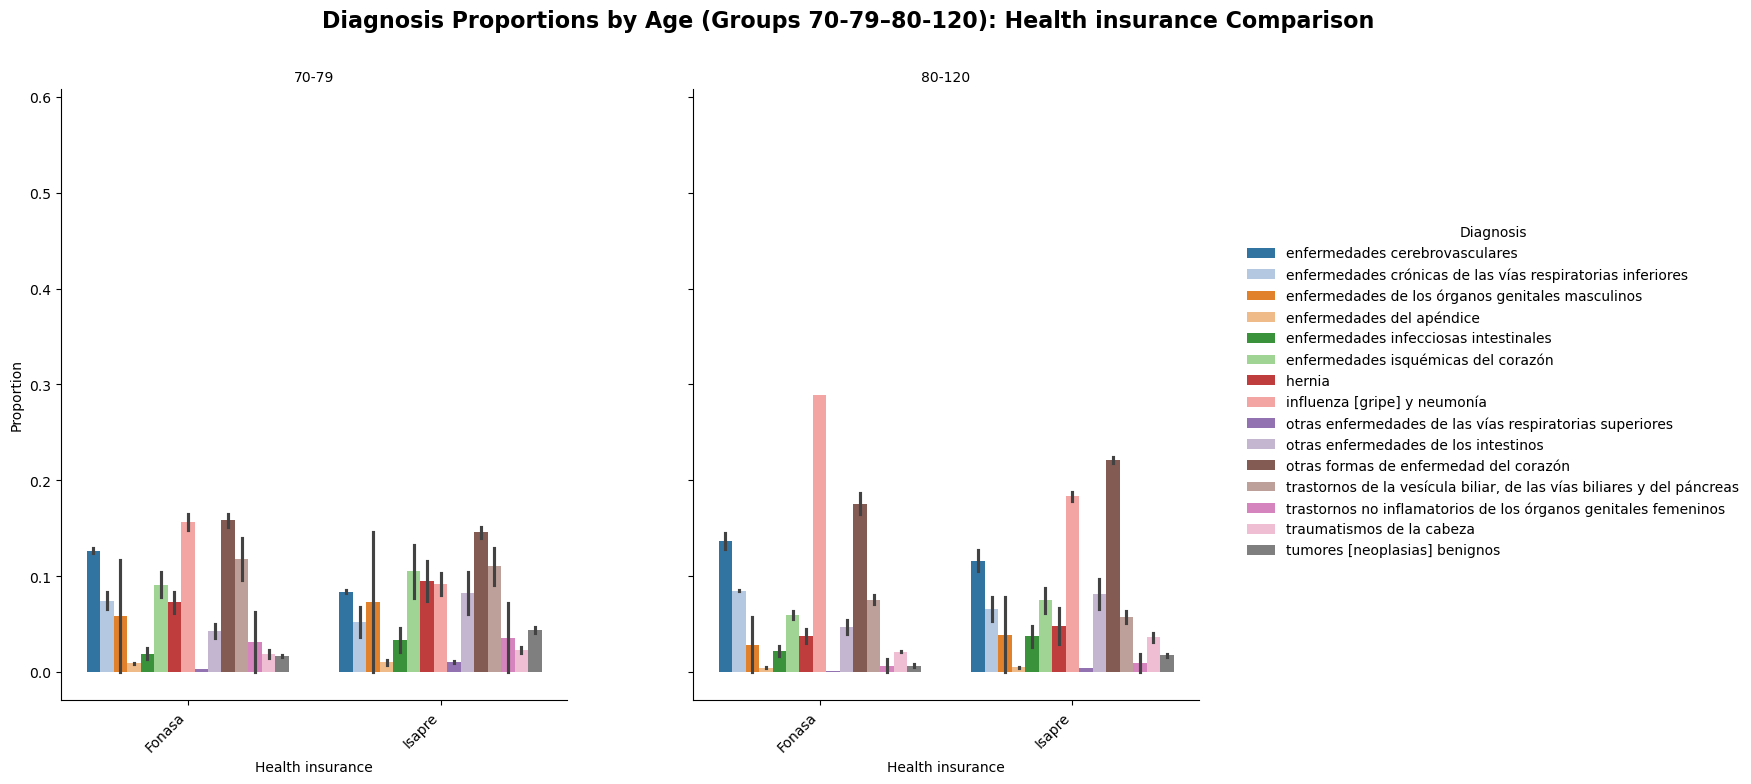

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# === Sort unique ages to keep them ordered ===
age_groups = sorted(long_df_g1['age'].unique())

# === Split the list into chunks of 2 ===
def chunk_list(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# === Find global y-axis range ===
y_min = long_df_g1['proportion'].min()
y_max = long_df_g1['proportion'].max()
y_buffer = (y_max - y_min) * 0.05
y_min -= y_buffer
y_max += y_buffer

# === Fix color order (palette) across all figures ===
diagnosis_order = sorted(long_df_g1['Diagnosis_grouped'].unique())

# Use a categorical palette with clearly distinct colors (up to 20)
palette = sns.color_palette("tab20", n_colors=len(diagnosis_order))

# === Loop over age group chunks (2 per figure) ===
for i, age_chunk in enumerate(chunk_list(age_groups, 2), start=1):
    df_subset = long_df_g1[long_df_g1['age'].isin(age_chunk)]

    g = sns.catplot(
        data=df_subset,
        kind='bar',
        x='health insurance',
        y='proportion',
        hue='Diagnosis_grouped',
        hue_order=diagnosis_order,    # consistent color mapping
        col='age',                    # one subplot per age group
        height=5,
        aspect=1.2,
        palette=palette,
        legend_out=True
    )

    # === Styling ===
    g.set_axis_labels("Health insurance", "Proportion")
    g.set_titles("{col_name}")
    g._legend.set_title("Diagnosis")
    g.set_xticklabels(rotation=45, ha='right')

    # Consistent y-axis limits
    for ax in g.axes.flatten():
        ax.set_ylim(y_min, y_max)

    # Layout and title
    g.fig.subplots_adjust(top=0.88, wspace=0.25)
    g.fig.set_size_inches(18, 8)
    g.fig.suptitle(
        f"Diagnosis Proportions by Age (Groups {age_chunk[0]}–{age_chunk[-1]}): Health insurance Comparison",
        fontsize=16,
        fontweight='bold'
    )

    plt.show()


# 4. Concentration & Distribution Insights

In [140]:
# Count occurrences
diag_freq = df['group names'].value_counts(normalize=False).reset_index()
diag_freq.columns = ['group names', 'count']

# Add relative share and cumulative share
diag_freq['share'] = diag_freq['count'] / diag_freq['count'].sum()
diag_freq['cum_share'] = diag_freq['share'].cumsum()


In [142]:
diag_freq.head()

,group names,count,share,cum_share
0,"trastornos de la vesícula biliar, de las vías ...",1508792,0.058574,0.058574
1,influenza [gripe] y neumonía,1302182,0.050553,0.109127
2,enfermedades del apéndice,810863,0.031479,0.140606
3,otras formas de enfermedad del corazón,687480,0.026689,0.167295
4,hernia,647833,0.025150,0.192445


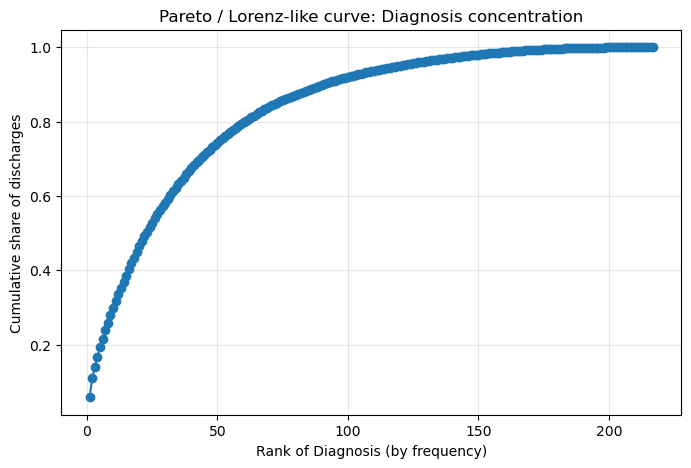

In [144]:
diag_freq_sorted = diag_freq.sort_values('share', ascending=False).reset_index(drop=True)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(diag_freq_sorted)+1), diag_freq_sorted['cum_share'], marker='o')
plt.xlabel('Rank of Diagnosis (by frequency)')
plt.ylabel('Cumulative share of discharges')
plt.title('Pareto / Lorenz-like curve: Diagnosis concentration')
plt.grid(True, alpha=0.3)
plt.show()

In [146]:
H = (diag_freq['share'] ** 2).sum()

In [148]:
H

0.016876083575632663

In [150]:
for x in [5, 10, 15]:
    top_share = diag_freq_sorted['share'].iloc[:x].sum()
    print(f"Top {x} diagnoses = {top_share:.1%} of all discharges")


Top 5 diagnoses = 19.2% of all discharges
Top 10 diagnoses = 29.9% of all discharges
Top 15 diagnoses = 38.6% of all discharges


In [152]:
sub_concentration = (
    df.groupby(['age', 'health insurance', 'group names'], observed=True)
      .size()
      .groupby(level=[0,1])
      .apply(lambda x: ((x / x.sum()) ** 2).sum())
      .reset_index(name='HHI')
)


C:\Users\mirko\AppData\Local\Temp\ipykernel_16356\3622326724.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(level=[0,1])


In [153]:
sub_concentration

,age,health insurance,HHI
0,0-1,Fonasa,0.065228
1,0-1,Isapre,0.051445
2,1-9,Fonasa,0.040694
3,1-9,Isapre,0.061781
4,10-19,Fonasa,0.031298
5,10-19,Isapre,0.031869
6,20-29,Fonasa,0.025409
7,20-29,Isapre,0.026383
8,30-39,Fonasa,0.027264
9,30-39,Isapre,0.026581


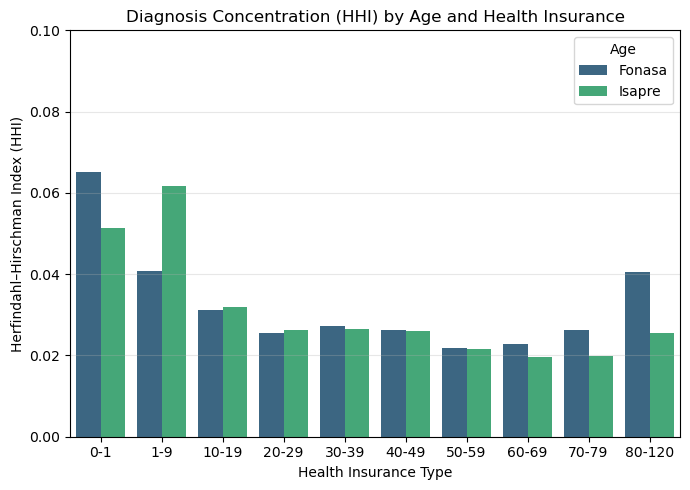

In [156]:
plt.figure(figsize=(7,5))
sns.barplot(
    data=sub_concentration,
    x='age',
    y='HHI',
    hue='health insurance',
    palette='viridis'
)
plt.title('Diagnosis Concentration (HHI) by Age and Health Insurance')
plt.ylabel('Herfindahl–Hirschman Index (HHI)')
plt.xlabel('Health Insurance Type')
plt.ylim(0,0.1)
plt.legend(title='Age')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# 5. Conditional Relationships (3D Exploration)

In [73]:
# This will be done when LOS is analyzed, considering is the only continous variable and most important one

# 6. Normalized Profiles (Share-of-Group vs. Share-of-Total)

# 7. Outlier & Exception Analysis

In [ ]:
# This will be done when LOS is included in the group of variables to analyze

# 8. Effect Size Indicators (Descriptive)

In [124]:
# This will be done when LOS is included in the group of variables to analyze

# 9. Interpretation & Contextualization

# 10. Insight Blocks (Mini Stories)

# 11. Optional: Synthesis Dashboard (for the Report) --> One-pager structure. Fill it usign univariate an bivariate stages as well